In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import gensim
import re
import stylecloud
import dexplot as dxp
import nltk
from IPython.display import Image 
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS
RANDOM_SEED = 1

In [2]:
data=pd.read_csv(r"C:\Users\Yemul\3D Objects\3D\Intern\DataInfoSec\covid19_tweets.csv")

In [3]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


In [4]:
data.shape

(179108, 13)

In [5]:
data.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

Exploratory Data Analysis

In [6]:
# 1. Anayzing the length of tweets

C:\Users\Yemul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


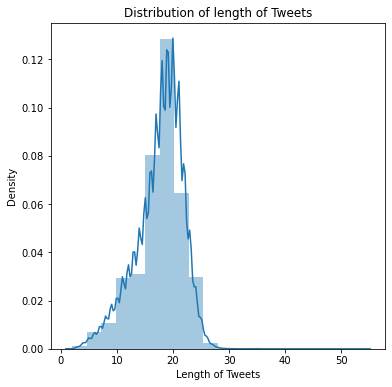

In [7]:
tweet_len = data['text'].str.split().apply(lambda x: len(x))

plt.figure(figsize = (6,6))
sns.distplot(tweet_len, bins = 20, kde = 'False',)
plt.xlabel('Length of Tweets')
plt.title('Distribution of length of Tweets')
plt.show()

The distribution for length of Tweets is a right-skewed one.

2. distribution of Tweets over the days

In [8]:
data.date= pd.to_datetime(data.date)
data.date

0        2020-07-25 12:27:21
1        2020-07-25 12:27:17
2        2020-07-25 12:27:14
3        2020-07-25 12:27:10
4        2020-07-25 12:27:08
                 ...        
179103   2020-08-29 19:44:21
179104   2020-08-29 19:44:16
179105   2020-08-29 19:44:15
179106   2020-08-29 19:44:14
179107   2020-08-29 19:44:08
Name: date, Length: 179108, dtype: datetime64[ns]

In [9]:
data['tweet_date'] = [d.date() for d in data['date']]
data['tweet_time'] = [d.time() for d in data['date']]
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_date,tweet_time
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,2020-07-25,12:27:21
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,2020-07-25,12:27:17
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14


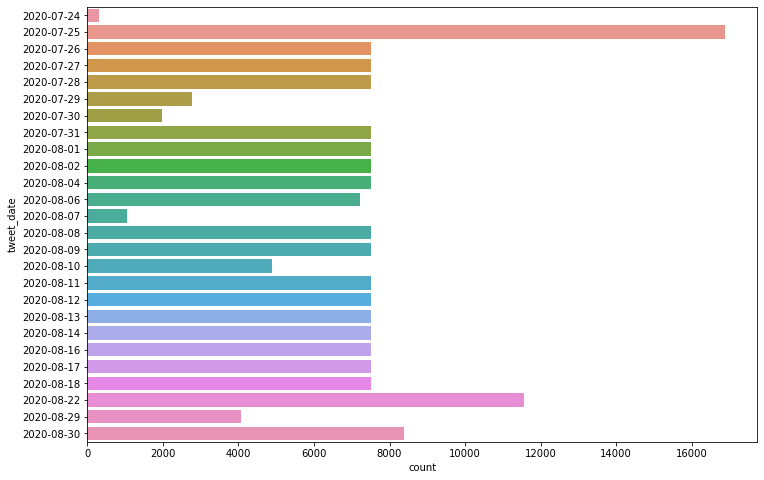

In [10]:
data.sort_values('date', inplace=True)
plt.figure(figsize=(12,8))
sns.countplot(y = data['tweet_date'])
plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


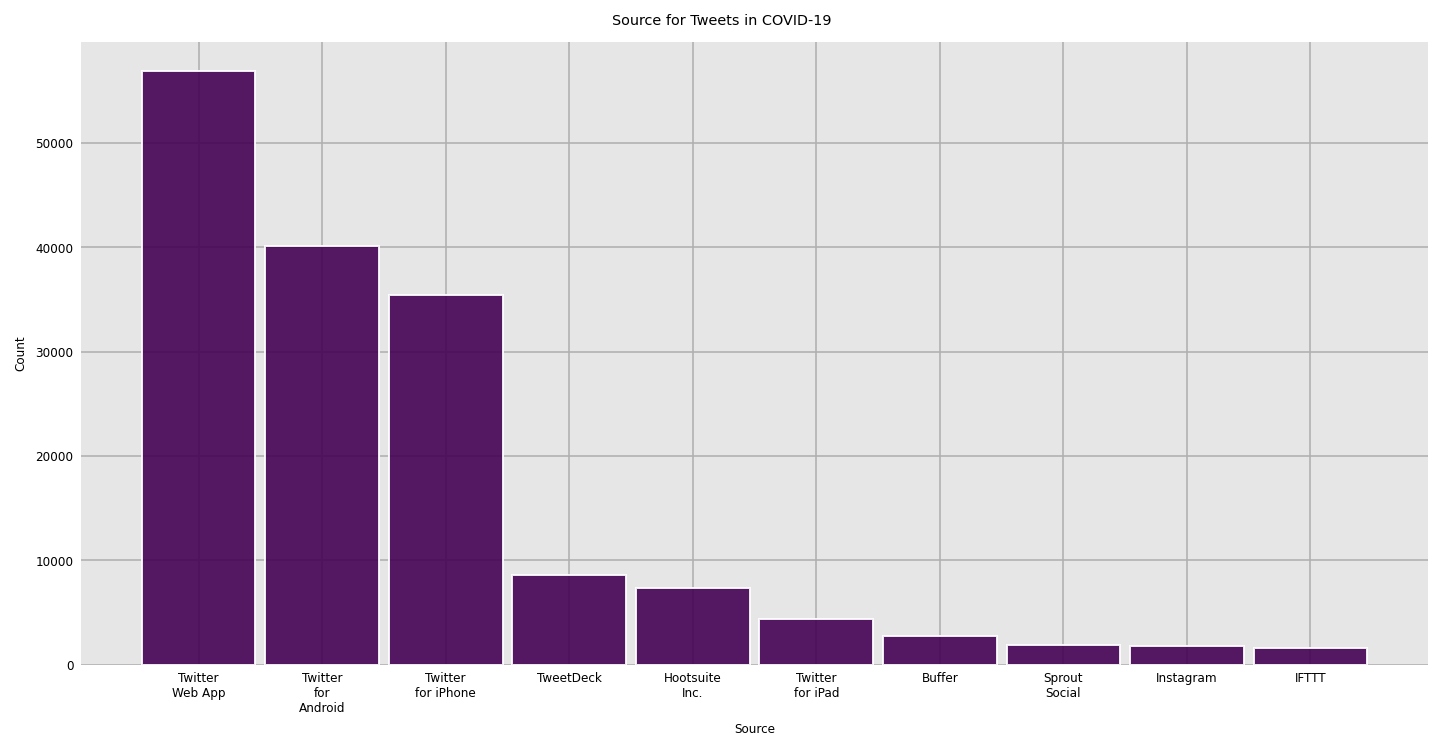

In [11]:
# Top 10 Sources of tweet

Top10_source = pd.DataFrame(data['source'].value_counts().sort_values(ascending=False)[:10]).reset_index()
Top10_source.columns = ['Source','Count']
dxp.bar(x='Source', y='Count', data=Top10_source,figsize=(10,5),cmap='viridis',title='Source for Tweets in COVID-19')

In [12]:
# Top 10 User Location

best_10_regions = pd.DataFrame(data['user_location'].value_counts().sort_values(ascending=False)[:15]).reset_index()
best_10_regions.columns = ['user_location','Count']

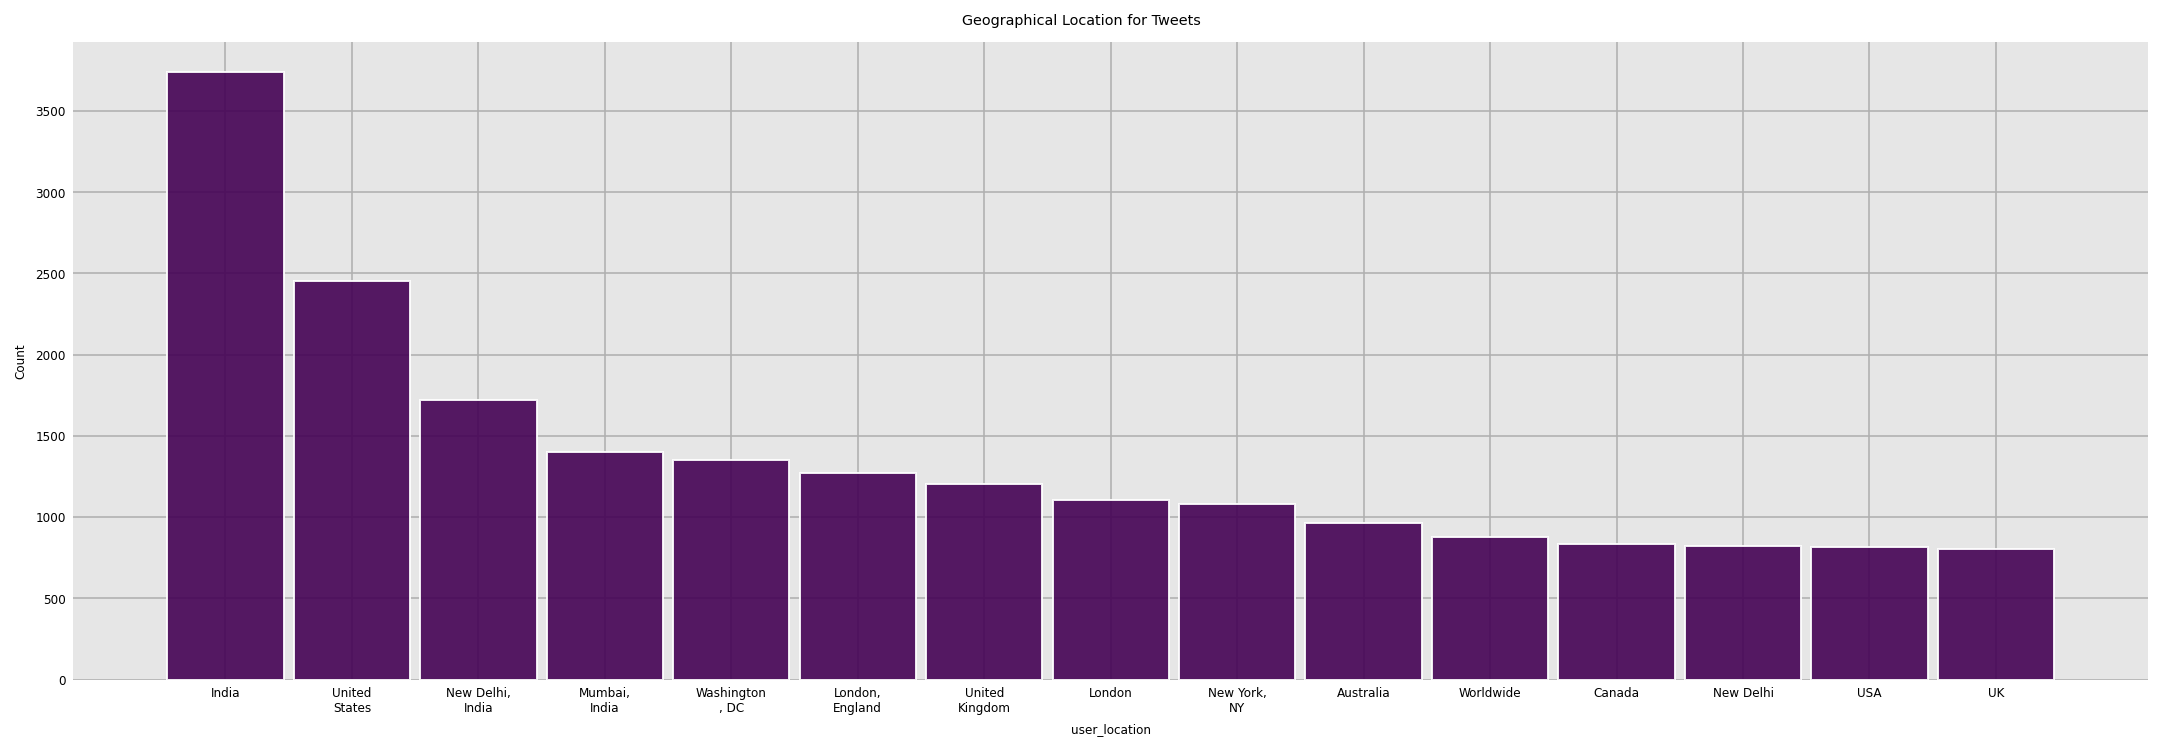

In [13]:

dxp.bar(x='user_location', y='Count', data=best_10_regions,
        figsize=(15,5),cmap='viridis',title='Geographical Location for Tweets')

In [14]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_date,tweet_time
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,NaN,Twitter Web App,False,2020-07-24,23:47:08
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",NaN,Twitter Web App,False,2020-07-24,23:47:13


In [15]:
# Top 10 Users 

Top10_user = pd.DataFrame(data['user_name'].value_counts().sort_values(ascending=False)[:10]).reset_index()
Top10_user.columns = ['user_name','count']

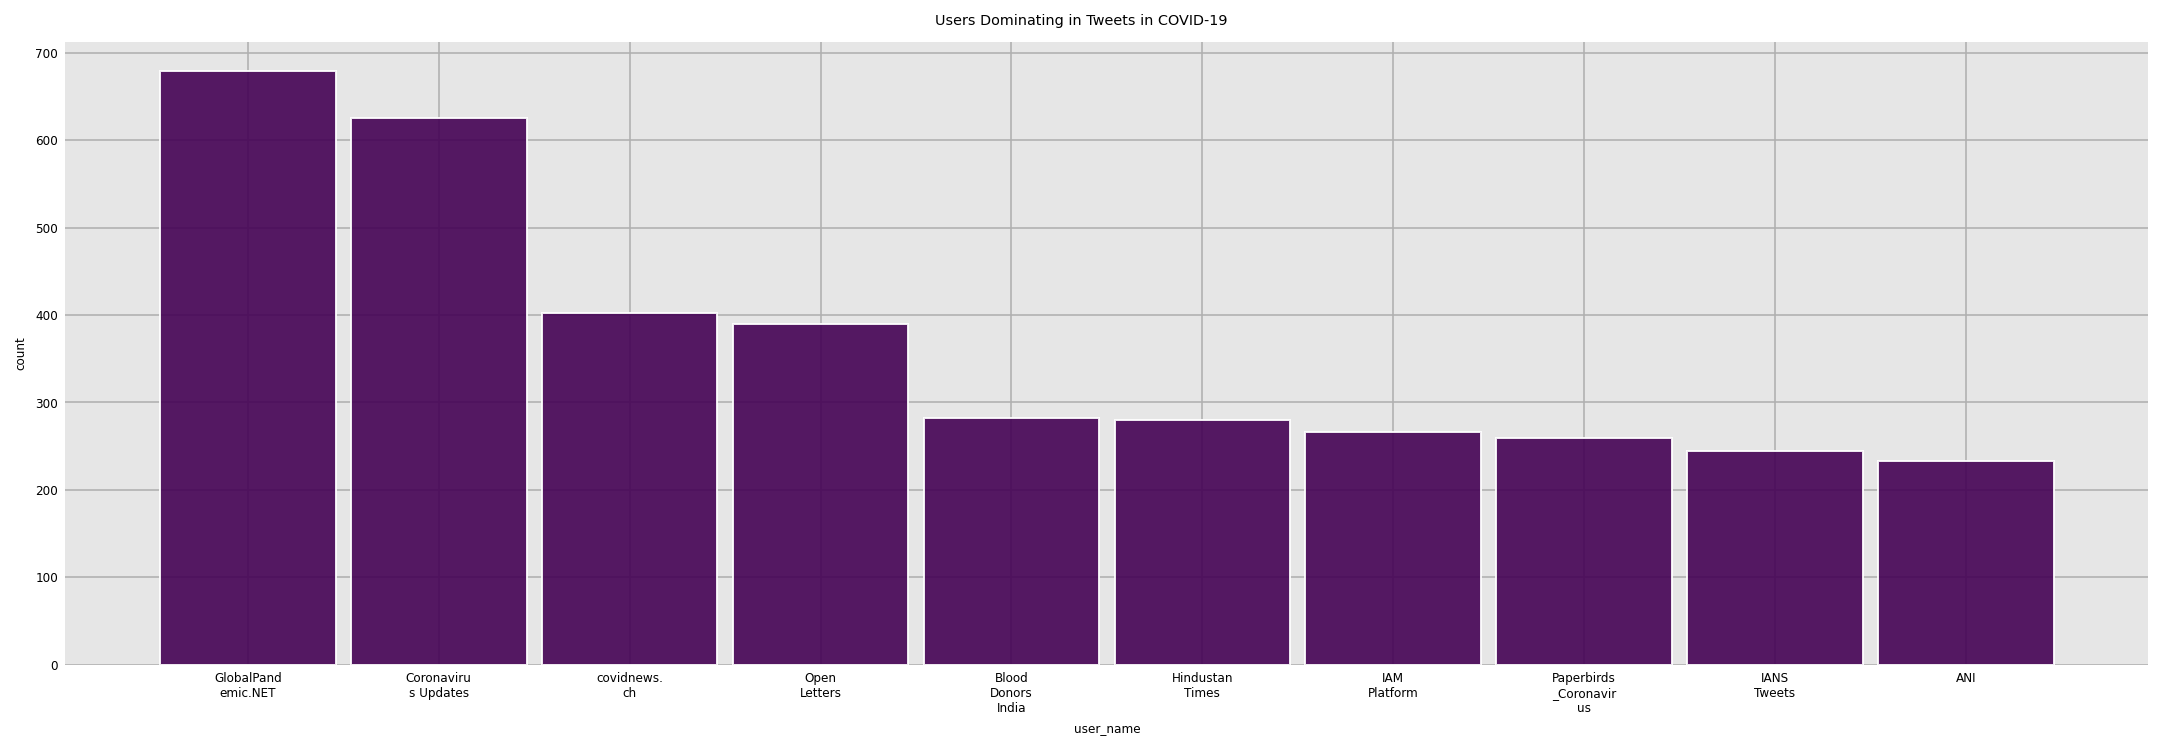

In [16]:
dxp.bar(x='user_name', y='count', data=Top10_user,figsize=(15,5)
        ,cmap='viridis',title='Users Dominating in Tweets in COVID-19')

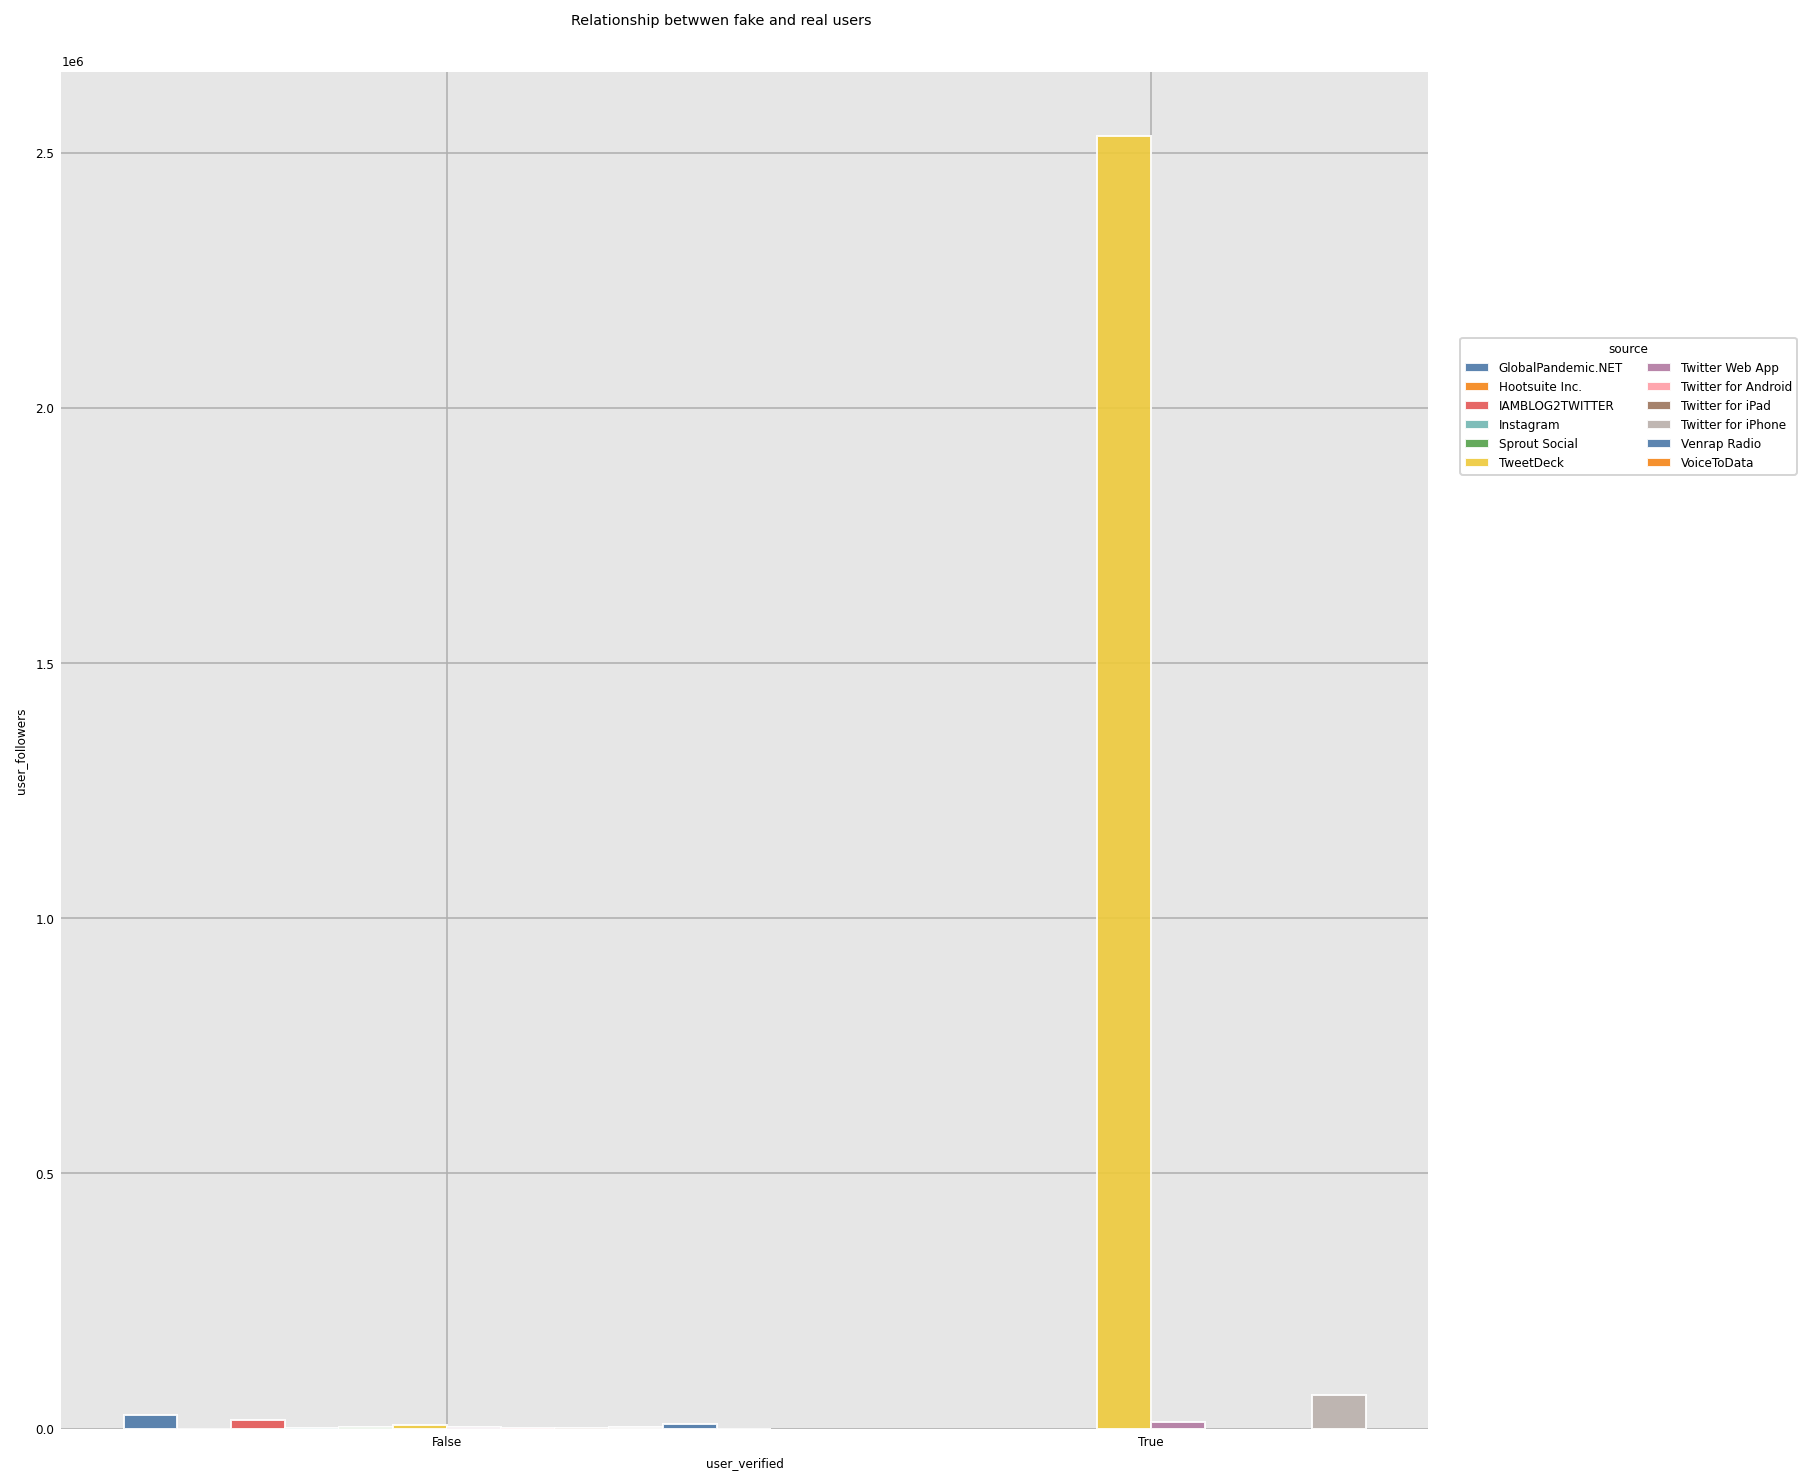

In [17]:
#  Relationship between user real and fake users

dxp.bar(x='user_verified', y='user_followers', data=data.head(100),
        figsize=(10,10),split='source',aggfunc='mean',title='Relationship betwwen fake and real users')

In [18]:
# Hashtags used 

hashtags = data['hashtags'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)
stylecloud.gen_stylecloud(text = unique_hashtags,
                          icon_name='fas fa-first-aid',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')




C:\Users\Yemul\anaconda3\lib\site-packages\stylecloud\stylecloud.py:135: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  gradient = np.array(makeMappingArray(size, palette_func.mpl_colormap))


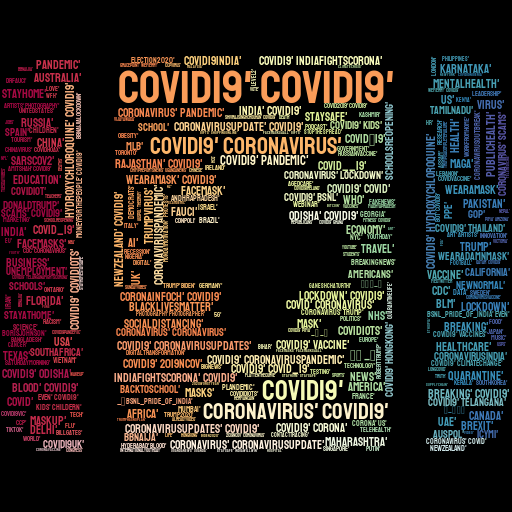

In [19]:
Image("./stylecloud.png",width = 600, height = 600)

Cleanup Tweets
Remove Stopwords, Punctuations, Emoticons, URLS

Keep Hashtags and Mentions (We will be using those later!)

In [20]:
import string
punct = string.punctuation

import emoji

def deEmojify(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() 
                           if not any(i in str for i in emoji_list)])
    return clean_text

def removeURL(text):
    clean_text = re.sub(r"http\S+", "", text)
    return clean_text

def tokenize_tweets(dataframe):
    tokenized_data = []
    for i,tweet in enumerate(dataframe['text']):
        sentence = []
        tweet = deEmojify(tweet)
        tweet = removeURL(tweet)
        for w in tweet.split():
            if w.lower() not in stop_words and w not in punct and w!='&amp;':
                sentence.append(w.lower())
        dataframe['text'][i] = ' '.join(sentence)
        tokenized_data.append(sentence)       
    return tokenized_data, dataframe

tweets_US_tokenized, data = tokenize_tweets(data)
print(data['text'][:5])
print(tweets_US_tokenized[:5])

C:\Users\Yemul\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


17175    protestors needed 6pm-10pm daily (now). 1450 e...
17174    always honored speak w @nicolledwallace critic...
17173    excellent partnership prevent #covid19, thank ...
17172    take eye ball. still protests going people dyi...
17171    apparently, timberlea @saveonfoods store fort ...
Name: text, dtype: object
[['protestors', 'needed', '6pm-10pm', 'daily', '(now).', '1450', 'e', 'mckinney', 'denton', 'county', 'jail.', 'covid19', 'outbreak.', 'released', 'trustee', 'repo…'], ['always', 'honored', 'speak', 'w', '@nicolledwallace', 'critical', '#covid19', 'health', 'issues.', 'midst'], ['excellent', 'partnership', 'prevent', '#covid19,', 'thank', 'sharps', 'roasthouse'], ['take', 'eye', 'ball.', 'still', 'protests', 'going', 'people', 'dying', '#covid19…'], ['apparently,', 'timberlea', '@saveonfoods', 'store', 'fort', 'mcmurray,', 'employee', 'allowed', 'wear', 'face', 'mask,', 'w…']]


In [21]:
from PIL import Image
def show_WordCloud(data_list, title = None):
    data_list_compiled = ''
    data_list_compiled += " ".join(data_list)+" "
    wordcloud = WordCloud(background_color = 'white', max_words = 200, min_font_size = 10, max_font_size=40).generate(str(data_list_compiled))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
    
def top_list_elements(list_data, N = 20):
    """returns a dictionary of hashtags and the number of times they have been used"""
    count =Counter(list_data)
    top_elements = dict(sorted(count.items(), key = lambda x:x[1], reverse = True)[:N])
    return top_elements

3. the top Hashtags used.

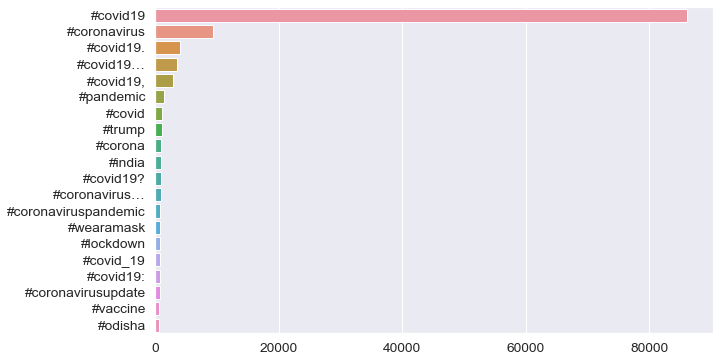

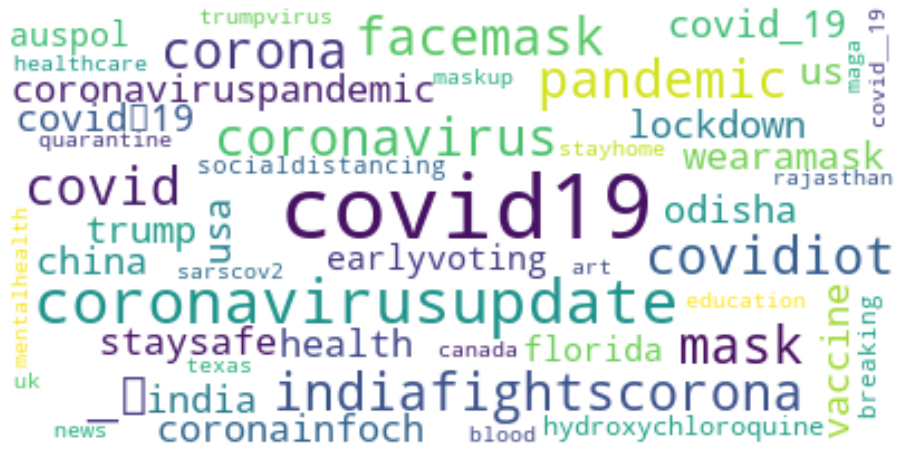

In [22]:
def extract_Hashtags(tokenized_data):
    """ returns list of hashtags used """
    list_hashtag = []
    for tweets in tokenized_data:
        list_hashtag.append([w for w in tweets if w.startswith('#')])
    return [item for sublist in list_hashtag for item in sublist]

tweets_Hashtag = extract_Hashtags(tweets_US_tokenized)
top_N_Hashtags = top_list_elements(tweets_Hashtag, N=100)

plt.figure(figsize = (10, 6))
sns.set(font_scale=1.25) 
sns.barplot(x = list(top_N_Hashtags.values())[:20], y = list(top_N_Hashtags.keys())[:20])
plt.show()

plt.figure(figsize = (16, 16))
show_WordCloud(list(top_N_Hashtags.keys()))



4. Let's look at the top mentions.

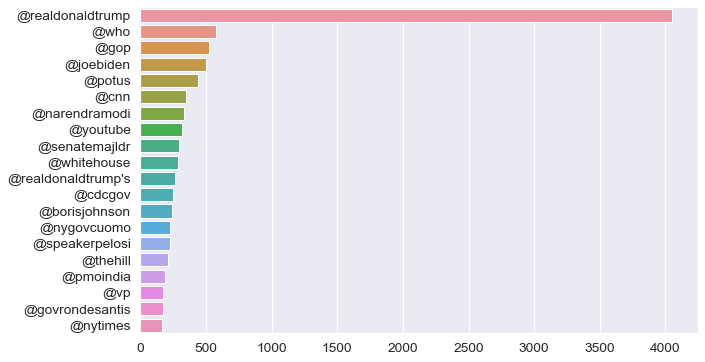

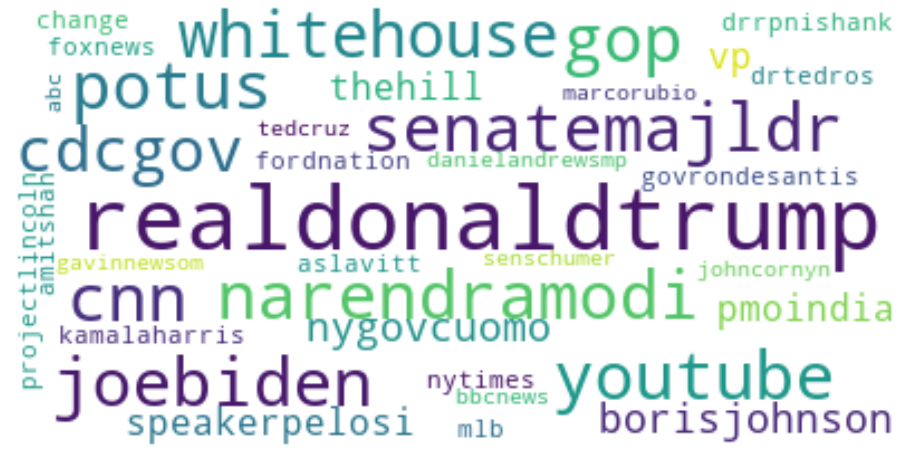

In [23]:
def extract_Mentions(tokenized_data):
    """ returns list of mentions used """
    list_mentions = []
    for tweets in tokenized_data:
        list_mentions.append([w for w in tweets if w.startswith('@')])
    return [item for sublist in list_mentions for item in sublist]

tweets_mentions = extract_Mentions(tweets_US_tokenized)
top_N_Mentions = top_list_elements(tweets_mentions, N=50)

plt.figure(figsize = (10, 6))
sns.set(font_scale=1.25) 
sns.barplot(x = list(top_N_Mentions.values())[:20], y = list(top_N_Mentions.keys())[:20])
plt.show()

plt.figure(figsize = (16, 16))
show_WordCloud(list(top_N_Mentions.keys()))


Extract the sentiments of these tweets

In [24]:
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

data['sentiment'] = ' '
data['polarity'] = None
for i,tweets in enumerate(data.text) :
    blob = TextBlob(tweets)
    data['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        data['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        data['sentiment'][i] = 'negative'
    else :
        data['sentiment'][i] = 'neutral'
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_date,tweet_time,sentiment,polarity
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,protestors needed 6pm-10pm daily (now). 1450 e...,NaN,Twitter Web App,False,2020-07-24,23:47:08,negative,-0.05
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,always honored speak w @nicolledwallace critic...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12,neutral,0
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"excellent partnership prevent #covid19, thank ...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12,positive,1


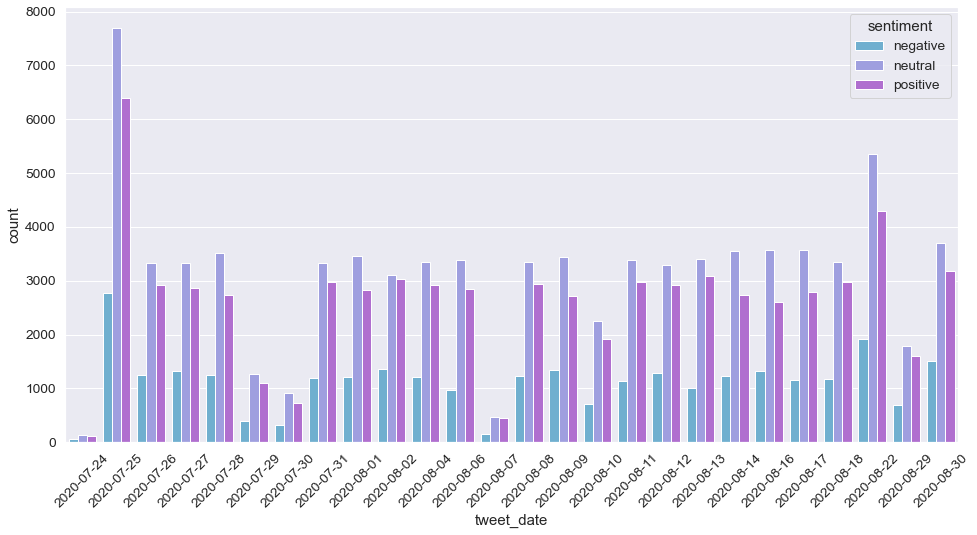

In [25]:
plt.figure(figsize = (16,8))
sns.countplot(x = data['tweet_date'], hue = 'sentiment', 
              data = data, palette = 'cool', saturation = 0.5)
plt.xticks(Rotation = 45)
plt.show()

The sentiment of tweeets is positive every day in the given period. However, towards mid April tweeter users were much less active and percentage of positive tweets diminished as well.

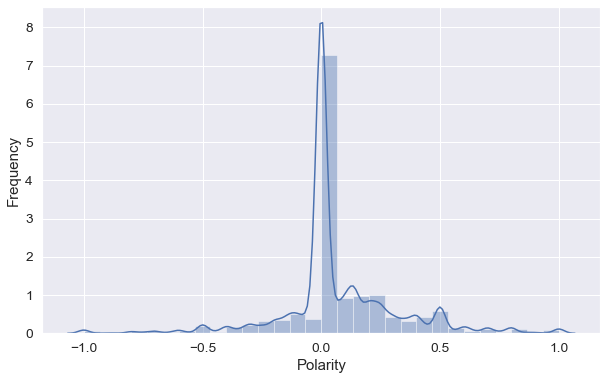

In [26]:
plt.figure(figsize = (10, 6))
sns.distplot(data['polarity'], bins = 30)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show()

We can see a fatter tail of the polarity in the positive direction.

In [27]:
pos = data['text'][data['sentiment'] == 'positive']
neutral = data['text'][data['sentiment'] == 'neutral']
neg = data['text'][data['sentiment'] == 'negative']

def extract_list(dataframe):
    data = []
    for tweet in dataframe:
        data.append(tweet.split())
    return data

pos_list = extract_list(pos)
neu_list = extract_list(neutral)
neg_list = extract_list(neg)

5. See the top hashtags in tweets of different sentiments.

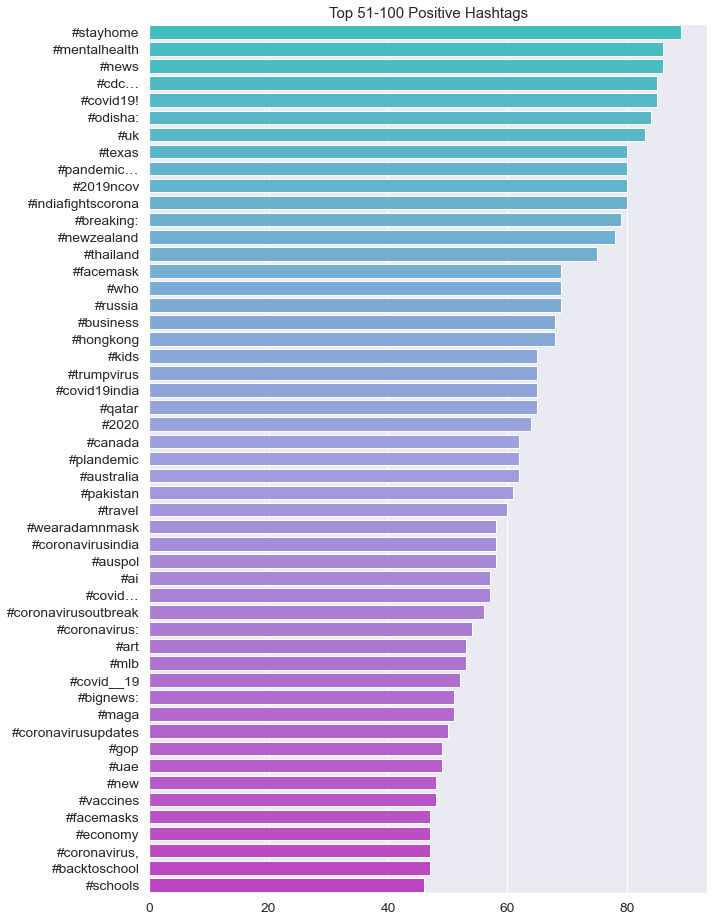

In [28]:

# Check the Hashtags in tweets of different sentiments

pos_Hashtag = extract_Hashtags(pos_list)
top_N_pos_Hashtags = top_list_elements(pos_Hashtag, N=100)
plt.figure(figsize = (10,16))
sns.barplot(x = list(top_N_pos_Hashtags.values())[49:], y = list(top_N_pos_Hashtags.keys())[49:], 
            palette = 'cool', saturation = 0.5)
plt.title('Top 51-100 Positive Hashtags')
plt.show()

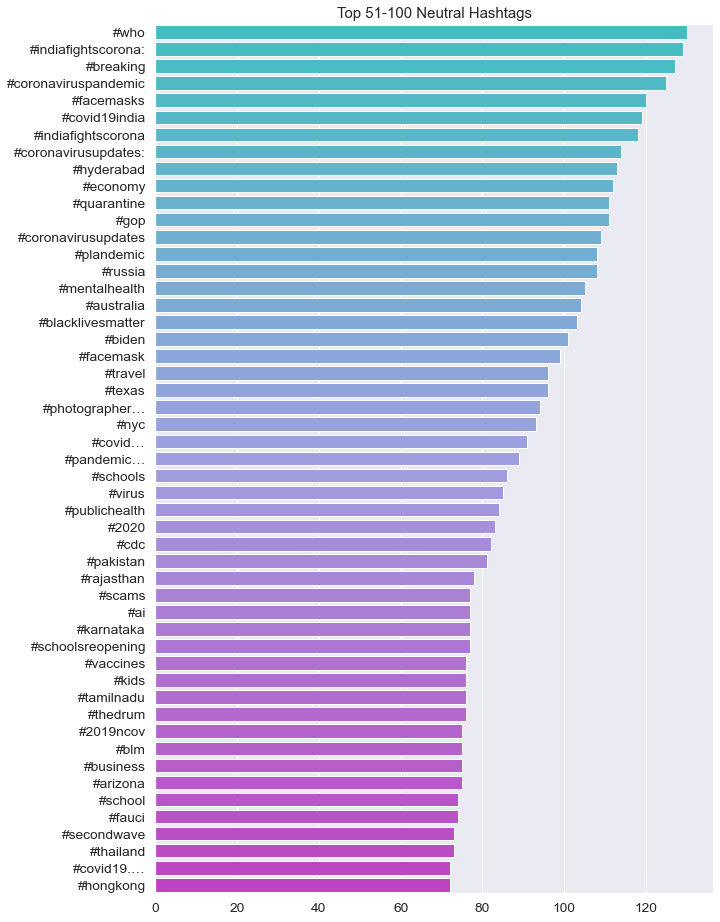

In [29]:
neu_Hashtag = extract_Hashtags(neu_list)
top_N_neu_Hashtags = top_list_elements(neu_Hashtag, N=100)
plt.figure(figsize = (10,16))
sns.barplot(x = list(top_N_neu_Hashtags.values())[49:], y = list(top_N_neu_Hashtags.keys())[49:], 
            palette = 'cool', saturation = 0.5)
plt.title('Top 51-100 Neutral Hashtags')
plt.show()

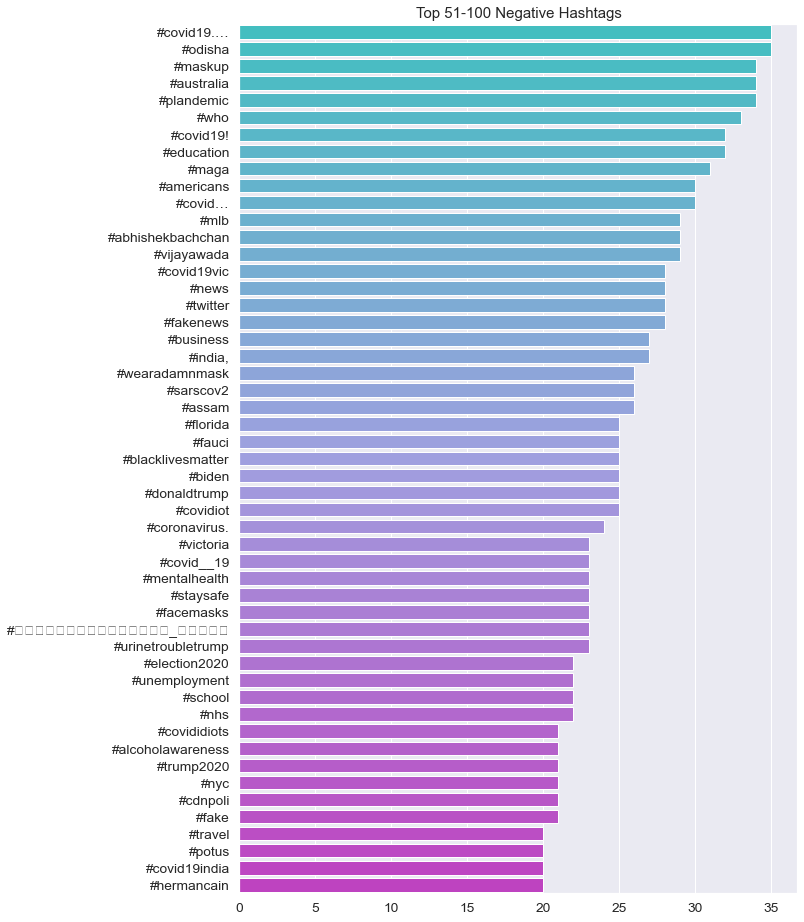

In [30]:
neg_Hashtag = extract_Hashtags(neg_list)
top_N_neg_Hashtags = top_list_elements(neg_Hashtag, N=100)
plt.figure(figsize = (10,16))
sns.barplot(x = list(top_N_neg_Hashtags.values())[49:], y = list(top_N_neg_Hashtags.keys())[49:], 
            palette = 'cool', saturation = 0.5)
plt.title('Top 51-100 Negative Hashtags')
plt.show()

Differences in hashtags used are apparent only if we skip the top 50 hashtags.

6. See the top mentions in tweets of different sentiments.

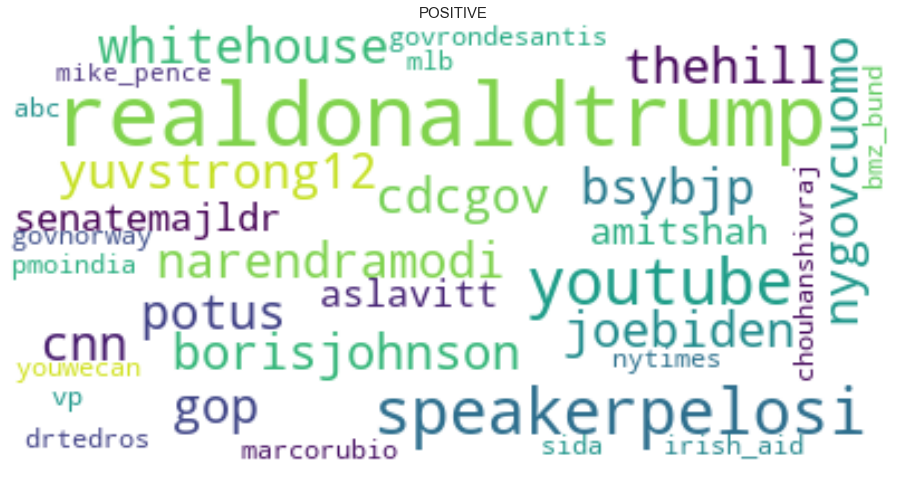

In [31]:
# Check the mentions in tweets of different sentiments

pos_mention = extract_Mentions(pos_list)
top_N_pos_Mentions = top_list_elements(pos_mention, N=200)
plt.figure(figsize = (16,10))
show_WordCloud(top_N_pos_Mentions, 'POSITIVE' )

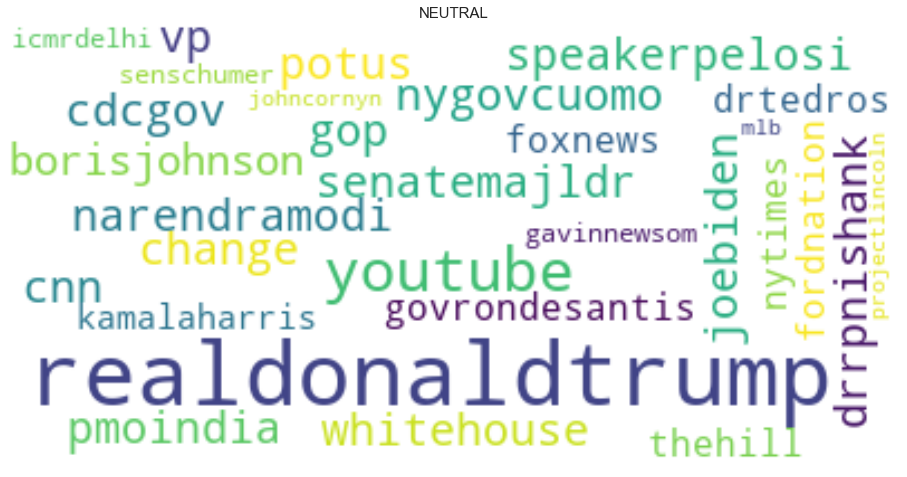

In [32]:
neu_mention = extract_Mentions(neu_list)
top_N_neu_Mentions = top_list_elements(neu_mention, N=200)
plt.figure(figsize = (16,10))
show_WordCloud(top_N_neu_Mentions , 'NEUTRAL')

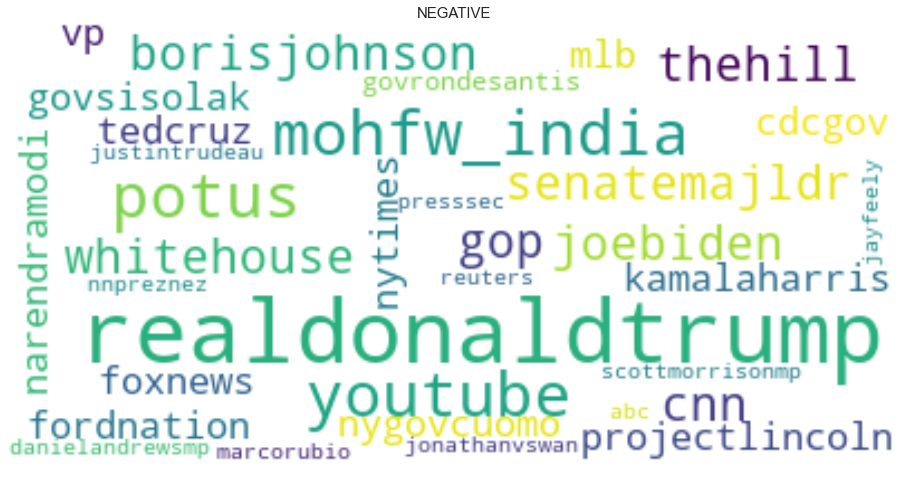

In [33]:
neg_mention = extract_Mentions(neg_list)
top_N_neg_Mentions = top_list_elements(neg_mention, N=200)
plt.figure(figsize = (16,10))
show_WordCloud(top_N_neg_Mentions , 'NEGATIVE')

7. See the words used in tweets of different sentiments

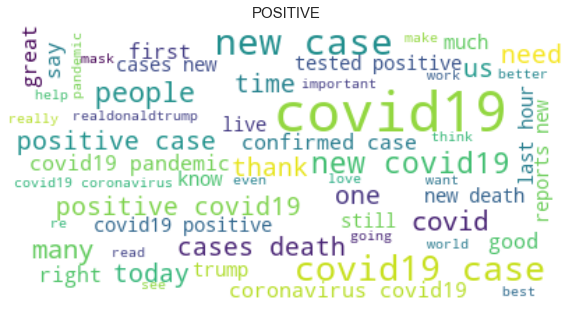

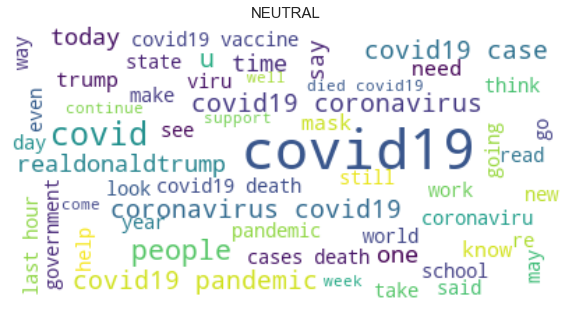

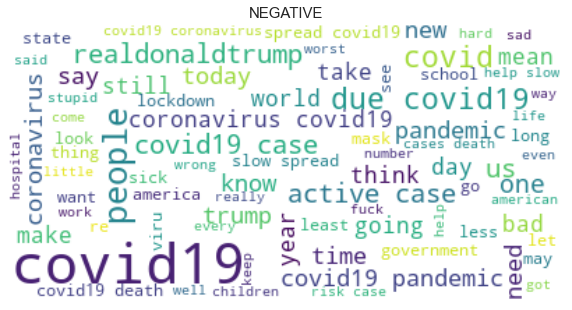

In [34]:
plt.figure(figsize = (10,10))
show_WordCloud(pos , 'POSITIVE')

plt.figure(figsize = (10,10))
show_WordCloud(neutral , 'NEUTRAL')

plt.figure(figsize = (10,10))
show_WordCloud(neg , 'NEGATIVE')